In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from sklearn.feature_selection import f_classif
import scipy.stats as sm
import pickle
from sklearn.model_selection import train_test_split
warnings.simplefilter('ignore')

In [2]:
loan_data_inputs_train=pd.read_csv('preprocessed_inputs_train.csv',index_col=0)
loan_data_target_train=pd.read_csv('preprocessed_target_train.csv',index_col=0)
loan_data_inputs_test=pd.read_csv('preprocessed_inputs_test.csv',index_col=0)
loan_data_target_test=pd.read_csv('preprocessed_target_test.csv',index_col=0)

In [3]:
loan_data_inputs_train.shape,loan_data_target_train.shape,loan_data_inputs_test.shape,loan_data_target_test.shape

((373028, 338), (373028, 1), (93257, 329), (93257, 1))

In [4]:
selected_category_name=[
'grade:A',
'grade:B', 
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',

'home_ownership:MORTGAGE',
'home_ownership:OWN',
'home_ownership:OTHER_NONE_ANY_RENT',

'addr_state:NY',
'addr_state:CA',
'addr_state:TX',
'addr_state:ND',
'addr_state:NE_IA_NV_FL_HI_AL_ND',
'addr_state:WV_NH_WY_DC_ME_ID',
'addr_state:VA_NM',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',

'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',


'purpose:sml_busi_educational',
'purpose:mving_house_oths_renew_engy_medical',
'purpose:wedng_vction_debt_consldtn_wedding',
'purpose:credit_card',
'purpose:home_improvement',
'purpose:major_purchase',

'initial_list_status:f',
'initial_list_status:w',

'term_int:36',
'term_int:60',

'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2_3_4',
'emp_length_int:5_6',
'emp_length_int:7_8_9',
'emp_length_int:10',

'Mths_since_earliest_cr_line:61_78',
'Mths_since_earliest_cr_line:79_110',
'Mths_since_earliest_cr_line:111_127',
'Mths_since_earliest_cr_line:128_159',
'Mths_since_earliest_cr_line:160_241',
'Mths_since_earliest_cr_line:242_257',
'Mths_since_earliest_cr_line:258_298',
'Mths_since_earliest_cr_line:299_338',
'Mths_since_earliest_cr_line:339_420',
'Mths_since_earliest_cr_line:421_550',
'Mths_since_earliest_cr_line:551_876',

'int_rate:<=7.897',
'int_rate:7.897_9.548',
'int_rate:9.548_12.025',
'int_rate:12.025_14.089',
'int_rate:14.089_15.740',
'int_rate:15.740_20.281',
'int_rate:>20.281',


'annual_inc:<=19027',
'annual_inc:19027_27529',
'annual_inc:27529_36158',
'annual_inc:36158_44723',
'annual_inc:44723_50434',
'annual_inc:50434_61854',
'annual_inc:61854_73275',
'annual_inc:73275_81841',
'annual_inc:81841_101827',
'annual_inc:101827_121813',
'annual_inc:121813_144655',
'annual_inc:>144655',

'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0_3',
'mths_since_last_delinq:4_30',
'mths_since_last_delinq:31_56',
'mths_since_last_delinq:>=57',

'Mths_since_issue_d:<28',
'Mths_since_issue_d:29<=>31',
'Mths_since_issue_d:32<=>34',
'Mths_since_issue_d:35<=>37',
'Mths_since_issue_d:38<=>40',
'Mths_since_issue_d:41<=>43',
'Mths_since_issue_d:44<=>49',
'Mths_since_issue_d:50<=>52',
'Mths_since_issue_d:53<=>61',
'Mths_since_issue_d:62<=>79',
'Mths_since_issue_d:80<=>97',
'Mths_since_issue_d:98<=',

'dti:<=1.6',
'dti:1.6<=>3.999',
'dti:3.999<=>8.798', 
'dti:8.798<=>11.997',
'dti:11.997<=>15.196',
'dti:15.196<=>16.796',
'dti:16.796<=>19.995',
'dti:19.995<=>23.994',
'dti:23.994<=>26.393',
'dti:26.393<=>31.992',
'dti:31.992<=>35.191', 
'dti:>35.191',

'delinq_2yrs:0',
'delinq_2yrs:1',
'delinq_2yrs:2',
'delinq_2yrs:3_4_5',
'delinq_2yrs:>6',

'inq_last_6mths:0',
'inq_last_6mths:1',
'inq_last_6mths:2',
'inq_last_6mths:3',
'inq_last_6mths:4_5_6',
'inq_last_6mths:>=7',

'open_acc:<=19',
'open_acc:20<=>39', 
'open_acc:>=40',

'pub_rec:0',
'pub_rec:1',
'pub_rec:2_3', 
'pub_rec:>=4',

'total_acc:<=8',
'total_acc:9<=>15',
'total_acc:16<=>23',
'total_acc:24<=>27',
'total_acc:28<=>45',

'acc_now_delinq:0', 
'acc_now_delinq:>0',

'total_rev_hi_lim:<=19760',
'total_rev_hi_lim:19760<=>39520',
'total_rev_hi_lim:39520<=>59280',
'total_rev_hi_lim:59280<=>79040', 
'total_rev_hi_lim:>79040',

'mths_since_last_record:missing',
'mths_since_last_record:<3',
'mths_since_last_record:3<=>31',
'mths_since_last_record:32<=>50',
'mths_since_last_record:51<=>72',
'mths_since_last_record:73<=>84',
'mths_since_last_record:85<=>96',
'mths_since_last_record:97<=>113',
'mths_since_last_record:>=114'
]

## filtering data frame: selecting required  preprocessed column

In [5]:
loan_data_inputs_train_selected_col=loan_data_inputs_train.loc[:,selected_category_name]
loan_data_inputs_train_selected_col.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:OTHER_NONE_ANY_RENT,...,total_rev_hi_lim:>79040,mths_since_last_record:missing,mths_since_last_record:<3,mths_since_last_record:3<=>31,mths_since_last_record:32<=>50,mths_since_last_record:51<=>72,mths_since_last_record:73<=>84,mths_since_last_record:85<=>96,mths_since_last_record:97<=>113,mths_since_last_record:>=114
427211,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
loan_data_inputs_test_selected_col=loan_data_inputs_test.loc[:,selected_category_name]


## removing preprocessed column which is not necessary.

In [7]:
reference_col_to_remove=[
'grade:G',

'home_ownership:OTHER_NONE_ANY_RENT',

'addr_state:NE_IA_NV_FL_HI_AL_ND',

'verification_status:Verified',

'purpose:sml_busi_educational',

'initial_list_status:f',

'emp_length_int:0',

'Mths_since_earliest_cr_line:551_876',

'int_rate:>20.281',

'Mths_since_issue_d:98<=',

'term_int:60',

'dti:31.992<=>35.191',

'delinq_2yrs:>6',

'inq_last_6mths:>=7',

'open_acc:<=19',

'pub_rec:0',

'total_acc:<=8',

'acc_now_delinq:0',

'total_rev_hi_lim:<=19760',

'mths_since_last_record:<3'

    
]

In [8]:
loan_data_inputs_train_selected_col.drop(columns=reference_col_to_remove,inplace=True)
loan_data_inputs_test_selected_col.drop(columns=reference_col_to_remove,inplace=True)

In [9]:
del loan_data_inputs_train
del loan_data_inputs_test

In [10]:
loan_data_inputs_train_selected_col.shape,loan_data_inputs_test_selected_col.shape

((373028, 122), (93257, 122))

# Estimation of PD(probability of default) Model

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [12]:
PD_reg_model=LogisticRegression()
PD_reg_model.fit(loan_data_inputs_train_selected_col,loan_data_target_train)

pd.options.display.max_rows=None
print('shape of the coefficients list',PD_reg_model.coef_.shape)
display(PD_reg_model.coef_)
pd.options.display.max_rows=False


shape of the coefficients list (1, 122)


array([[ 7.63385894e-01,  7.88129308e-01,  6.42425580e-01,
         4.72157724e-01,  2.99054322e-01,  1.12181527e-01,
         1.16878275e-01,  1.01408410e-01,  4.91232152e-02,
         5.59359641e-02,  2.17508293e-01,  0.00000000e+00,
         5.09558112e-01,  3.05523347e-02,  5.27936274e-02,
         7.03428995e-02,  1.29942915e-01,  8.97179172e-02,
         1.77925659e-01,  2.31840213e-01,  2.56165067e-01,
         3.14909794e-01,  7.36312131e-02, -1.99135428e-02,
         4.47750924e-01,  4.60729053e-01,  5.58620866e-01,
         4.47513415e-01,  6.27922862e-01,  4.02202020e-02,
         8.31293912e-02,  9.98430244e-02,  1.23227070e-01,
         9.07182251e-02,  6.04209769e-02,  1.23727193e-01,
         1.95559088e-01,  8.33778352e-02,  8.89794999e-02,
         1.56353331e-01,  1.40674885e-01,  1.77015165e-01,
         2.33446489e-01,  2.02863652e-01,  2.15815003e-01,
         2.44432679e-01,  1.48238743e+00,  9.52673325e-01,
         6.19003659e-01,  3.81773255e-01,  2.85396212e-0

Predicting trained data


In [13]:
loan_data_predict_train=PD_reg_model.predict_proba(loan_data_inputs_train_selected_col)[:,1]

df_predict_train=pd.DataFrame({
                                'ground_truth':loan_data_target_train['good_bad'].values,
                                'predictProb':loan_data_predict_train
                              })
df_predict_train.head()

tr=0.6
df_predict_train['predict_cls']=np.where(df_predict_train['predictProb']>tr,1,0)
confusion_matrix=pd.crosstab(index=df_predict_train['ground_truth'],columns=df_predict_train['predict_cls'], rownames=['ground_truth'],colnames=['prediction'])
print(f'model accuracy is {(confusion_matrix.iloc[0,0]+confusion_matrix.iloc[1,1])/df_predict_train.shape[0]} with threshold value {tr}')
confusion_matrix/df_predict_train.shape[0]

model accuracy is 0.8902522062686983 with threshold value 0.6


prediction,0,1
ground_truth,,
0,0.000946,0.108370
1,0.001378,0.889306


testing on test data

## Roc curve 

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score


In [15]:
fpr,tpr,tr_list=roc_curve(df_predict_train['ground_truth'],df_predict_train['predictProb'])
fpr.shape,tpr.shape,tr_list.shape

((69038,), (69038,), (69038,))

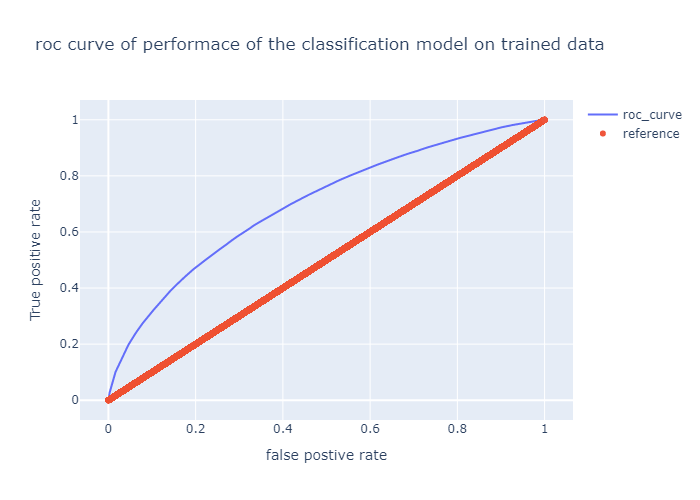

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr,
                    mode='lines',
                    name='roc_curve'))
fig.add_trace(go.Scatter(x=fpr, y=fpr,
                    mode='markers',
                    name='reference'))
fig.update_layout(title=dict(text='roc curve of performace of the classification model on trained data'),
                 xaxis=dict(title='false postive rate'),
                  yaxis=dict(title='True positive rate')
                 )
fig.show('png')

In [17]:
area_under_the_curve=roc_auc_score(df_predict_train['ground_truth'],df_predict_train['predictProb'])
area_under_the_curve.round(3)

0.7

In [18]:
loan_data_predict_test=PD_reg_model.predict_proba(loan_data_inputs_test_selected_col)[:,1]

df_predict_test=pd.DataFrame({
                                'ground_truth':loan_data_target_test['good_bad'].values,
                                'predictProb':loan_data_predict_test
                              })

tr=0.6
df_predict_test['predict_cls']=np.where(df_predict_test['predictProb']>tr,1,0)
confusion_matrix=pd.crosstab(index=df_predict_test['ground_truth'],columns=df_predict_test['predict_cls'], rownames=['ground_truth'],colnames=['prediction'])
print(f'model accuracy is {(confusion_matrix.iloc[0,0]+confusion_matrix.iloc[1,1])/df_predict_test.shape[0]} with threshold value {tr}')
confusion_matrix/df_predict_test.shape[0]

model accuracy is 0.8906891707861072 with threshold value 0.6


prediction,0,1
ground_truth,,
0,0.001137,0.108131
1,0.001180,0.889553


# Anova test for feature selection.

In [19]:
f_statistic, p_values = f_classif(loan_data_inputs_train_selected_col,loan_data_target_train)

pd.options.display.max_rows=None
df_Pvalue_Of_col=pd.DataFrame({'columnName':loan_data_inputs_train_selected_col.columns.values,
             'p_values': p_values.round(3),
             })
df_Pvalue_Of_col

,columnName,p_values
0,grade:A,0.000
1,grade:B,0.000
2,grade:C,0.000
3,grade:D,0.000
4,grade:E,0.000
5,grade:F,0.000
6,home_ownership:MORTGAGE,0.000
7,home_ownership:OWN,0.256
8,addr_state:NY,0.000
9,addr_state:CA,0.000


removing columns which has p value more than 0.05. If in an group of columns, which has same prefix and only few of them has p value more than 0.05 then no column will be removed. if most of them has more than 0.05 p value then all column of same prefix will be removed.  

1. column with grade prefix will be retained as no column have p value more than 0.05.
2. home_owenership column will be retained.
3. addr_state also will be retained since only few of them has p value more than 0.05.
4. verification status will be ratained.
5. purpose column also would be retained.
6. initial list statsu would be retained.
7. term_int also would be retained.
8. emp_length also retained.
9. Mths_since_last_cr_line aslo retained.
10. int_rate also retained.
11. annual_inc aslo retained.
12. mths_since_last_delinq retained.
13. Mths_since_issue_d retained.
14. dti retained.
15. delinq_2yrs will be `removed` since most of the column has more than 0.5 p-value.
16. inq_last_6mths retained.
17. open_acc will be retained.
18. pub_rec retained.
19. total_acc retained.
20. total_rev_hi_lim retained.
21. mths_since_last_record retained.
* so overall only column of one same prefix will be removed that is `delinq_2yrs`.

In [20]:
print(loan_data_inputs_train_selected_col.columns.shape)
loan_data_inputs_train_selected_col.drop(columns=['delinq_2yrs:0','delinq_2yrs:1','delinq_2yrs:2','delinq_2yrs:3_4_5'],inplace=True)
print(loan_data_inputs_train_selected_col.columns.shape)
loan_data_inputs_test_selected_col.drop(columns=['delinq_2yrs:0','delinq_2yrs:1','delinq_2yrs:2','delinq_2yrs:3_4_5'],inplace=True)

(122,)
(118,)


# training and testing the model again

In [21]:
PD_reg_model=LogisticRegression()
PD_reg_model.fit(loan_data_inputs_train_selected_col,loan_data_target_train)

pd.options.display.max_rows=None
print('shape of the coefficients list',PD_reg_model.coef_.shape)
display(PD_reg_model.coef_)
pd.options.display.max_rows=False


shape of the coefficients list (1, 118)


array([[ 7.63524965e-01,  7.83724242e-01,  6.40940222e-01,
         4.72314626e-01,  2.98463022e-01,  1.10123154e-01,
         1.15556073e-01,  1.01122527e-01,  5.05611926e-02,
         5.76094342e-02,  2.19938653e-01,  0.00000000e+00,
         5.20370470e-01,  3.12079427e-02,  5.46295194e-02,
         7.30592347e-02,  1.31867975e-01,  9.04428300e-02,
         1.80590941e-01,  2.35767920e-01,  2.57699491e-01,
         3.17799455e-01,  7.04692038e-02, -1.95445534e-02,
         4.47469084e-01,  4.62877609e-01,  5.60761021e-01,
         4.49918301e-01,  6.21644920e-01,  4.01372231e-02,
         8.20679814e-02,  9.65546352e-02,  1.20867691e-01,
         8.90422306e-02,  5.76233005e-02,  1.22877173e-01,
         2.14529700e-01,  9.44556528e-02,  1.04328283e-01,
         1.69615725e-01,  1.54248791e-01,  1.90492574e-01,
         2.46663912e-01,  2.15673619e-01,  2.28510854e-01,
         2.53506923e-01,  1.47013324e+00,  9.58332209e-01,
         6.22928120e-01,  3.82131054e-01,  2.86180215e-0

In [22]:
pickle.dump(PD_reg_model,open('PD_reg_model.sav','wb'))

# testing on trained Data again

In [23]:
loan_data_predict_train=PD_reg_model.predict_proba(loan_data_inputs_train_selected_col)[:,1]

df_predict_train=pd.DataFrame({
                                'ground_truth':loan_data_target_train['good_bad'].values,
                                'predictProb':loan_data_predict_train
                              })
df_predict_train.head()

tr=0.407
df_predict_train['predict_cls']=np.where(df_predict_train['predictProb']>tr,1,0)
confusion_matrix=pd.crosstab(index=df_predict_train['ground_truth'],columns=df_predict_train['predict_cls'], rownames=['ground_truth'],colnames=['prediction'])
print(f'model accuracy is {(confusion_matrix.iloc[0,0]+confusion_matrix.iloc[1,1])/df_predict_train.shape[0]} with threshold value {tr}')
confusion_matrix/df_predict_train.shape[0]

model accuracy is 0.8906838092582863 with threshold value 0.407


prediction,0,1
ground_truth,,
0,0.000013,0.109303
1,0.000013,0.890670


In [24]:
fpr,tpr,tr_list=roc_curve(df_predict_train['ground_truth'],df_predict_train['predictProb'])
fpr.shape,tpr.shape,tr_list.shape

((68751,), (68751,), (68751,))

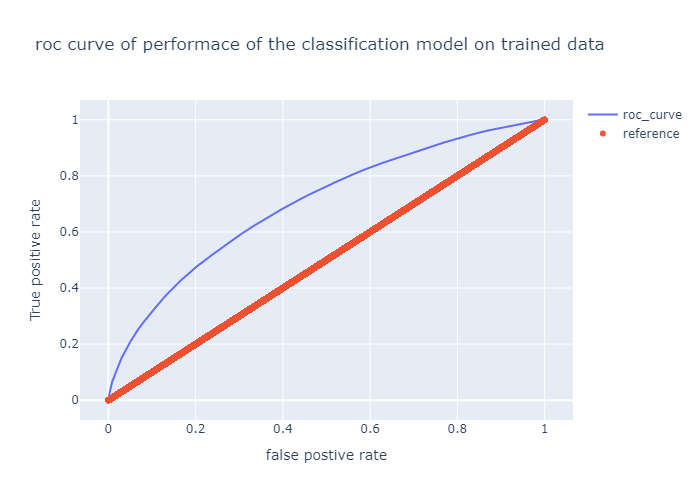

In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr,
                    mode='lines',
                    name='roc_curve'))
fig.add_trace(go.Scatter(x=fpr, y=fpr,
                    mode='markers',
                    name='reference'))
fig.update_layout(title=dict(text='roc curve of performace of the classification model on trained data'),
                 xaxis=dict(title='false postive rate'),
                  yaxis=dict(title='True positive rate')
                 )
fig.show('png')

In [26]:
loan_data_predict_test=PD_reg_model.predict_proba(loan_data_inputs_test_selected_col)[:,1]

df_predict_test=pd.DataFrame({
                                'ground_truth':loan_data_target_test['good_bad'].values,
                                'predictProb':loan_data_predict_test
                              })

tr=0.407
df_predict_test['predict_cls']=np.where(df_predict_test['predictProb']>tr,1,0)
confusion_matrix=pd.crosstab(index=df_predict_test['ground_truth'],columns=df_predict_test['predict_cls'], rownames=['ground_truth'],colnames=['prediction'])
print(f'model accuracy is {(confusion_matrix.iloc[0,0]+confusion_matrix.iloc[1,1])/df_predict_test.shape[0]} with threshold value {tr}')
confusion_matrix/df_predict_test.shape[0]

model accuracy is 0.8907427860643169 with threshold value 0.407


prediction,0,1
ground_truth,,
0,0.000021,0.109246
1,0.000011,0.890721


>note: no significant improvement in accuracy has been obserbed by removing column which has more p values.
>observation: accuracy on trained data and test data are almost 89 % for both.

# GINI and KOLMOGOROV-SMIRONOV COEFFICIENTS to acess the model performace for classification.

# GINI

* gini is used to calculate inequality between good borrowers and bad borrowers.
* This coefficients is calculated by ploting cumulative sum of all borrowers and cumulative sum of default borrowers.
* prerequisites to calculate this coefficients is to first sort the borrowers by ascending order of their estimated probability value for being a  good borrowers.
* this gini coefficients ara calculated by measuring the area between the secondary diagonal line and cuncave curve.
* the greater the area the greater the model.


In [27]:
df_predict_train.sort_values('predictProb',inplace=True)
df_predict_train.reset_index(inplace=True)
df_predict_train.head()

,index,ground_truth,predictProb,predict_cls
0,220562,0,0.280046,0
1,268470,1,0.340083,0
2,254375,1,0.366134,0
3,326275,0,0.367082,0
4,102040,1,0.382584,0


In [28]:
df_predict_train.index[0]

0

In [29]:
# calculating cumulative sum of borrowers, good borrowers, and bad borrowers.
df_predict_train['cum_N_population']=df_predict_train.index+1
df_predict_train['cum_Good_bors']=df_predict_train['ground_truth'].cumsum()
df_predict_train['cum_Bad_bors']=df_predict_train['cum_N_population']-df_predict_train['cum_Good_bors']
df_predict_train.head()

,index,ground_truth,predictProb,predict_cls,cum_N_population,cum_Good_bors,cum_Bad_bors
0,220562,0,0.280046,0,1,0,1
1,268470,1,0.340083,0,2,1,1
2,254375,1,0.366134,0,3,2,1
3,326275,0,0.367082,0,4,2,2
4,102040,1,0.382584,0,5,3,2


In [30]:
# calculating proportion of cumulative sum of total borrowers and good and bad borrowers.
df_predict_train['cum_per_population']=df_predict_train['cum_N_population']/df_predict_train.shape[0]
df_predict_train['cum_per_Good']=df_predict_train['cum_Good_bors']/df_predict_train['ground_truth'].sum()
df_predict_train['cum_per_Bad']=df_predict_train['cum_Bad_bors']/(df_predict_train.shape[0]-df_predict_train['ground_truth'].sum())
df_predict_train.head()

,index,ground_truth,predictProb,predict_cls,cum_N_population,cum_Good_bors,cum_Bad_bors,cum_per_population,cum_per_Good,cum_per_Bad
0,220562,0,0.280046,0,1,0,1,0.000003,0.000000,0.000025
1,268470,1,0.340083,0,2,1,1,0.000005,0.000003,0.000025
2,254375,1,0.366134,0,3,2,1,0.000008,0.000006,0.000025
3,326275,0,0.367082,0,4,2,2,0.000011,0.000006,0.000049
4,102040,1,0.382584,0,5,3,2,0.000013,0.000009,0.000049


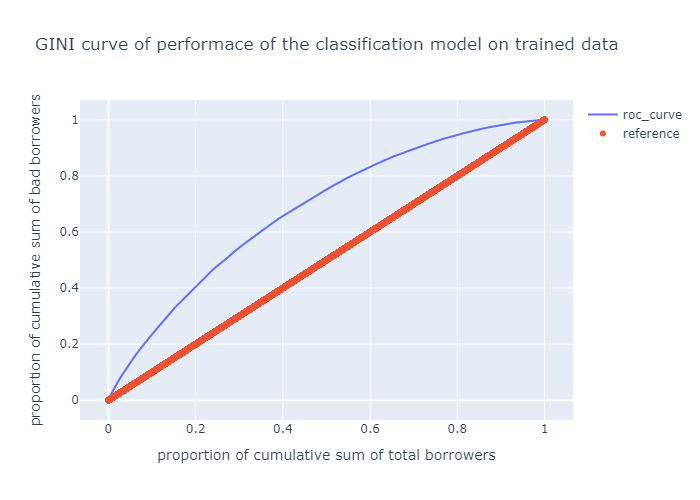

In [31]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_predict_train['cum_per_population'], y=df_predict_train['cum_per_Bad'],
                    mode='lines',
                    name='roc_curve'))
fig.add_trace(go.Scatter(x=df_predict_train['cum_per_population'], y=df_predict_train['cum_per_population'],
                    mode='markers',
                    name='reference'))
fig.update_layout(title=dict(text='GINI curve of performace of the classification model on trained data'),
                 yaxis=dict(title='proportion of cumulative sum of bad borrowers '),
                  xaxis=dict(title='proportion of cumulative sum of total borrowers')
                 )
fig.show('png')

In [32]:
area_under_the_curve*2-1

0.39919506324339227

# KOLMOGOROV-SMIRONOV

* this coefficients is calculated by the highest distance between cumulative distribution cruve of bad borrowers and cumulative distribution curve of good borrowers with resespect to their sorted estimated probability for being a good borrowers.
* IF the max distance between distribution of bad and good borrowers is significant then model will be considered powerfull enough to make the classification 

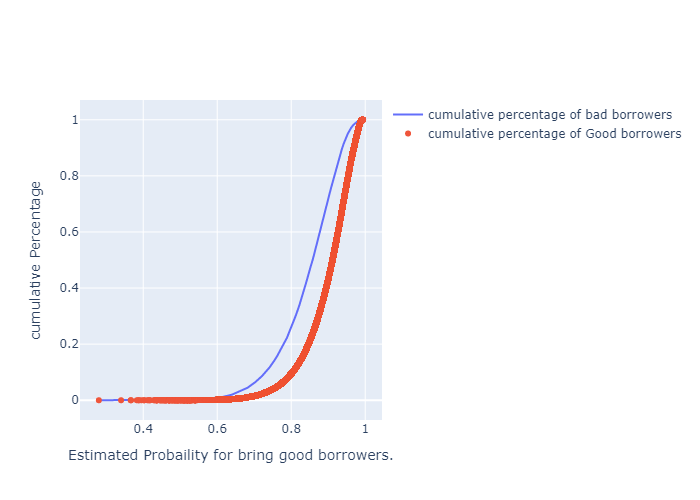

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_predict_train['predictProb'], y=df_predict_train['cum_per_Bad'],
                    mode='lines',
                    name='cumulative percentage of bad borrowers'))
fig.add_trace(go.Scatter(x=df_predict_train['predictProb'], y=df_predict_train['cum_per_Good'],
                    mode='markers',
                    name='cumulative percentage of Good borrowers'))
fig.update_layout(title=dict(text=''),
                 yaxis=dict(title='cumulative Percentage'),
                  xaxis=dict(title='Estimated Probaility for bring good borrowers.')
                 )
fig.show('png')

In [34]:
KS=(df_predict_train['cum_per_Bad']-df_predict_train['cum_per_Good']).max()
round(KS,3)

0.289

>note: from the above observed KS value it is clear that the model has satisfactory predictive power.

# building Score Card

In [35]:
df_summary_data=pd.DataFrame({'cat_name':loan_data_inputs_train_selected_col.columns.values,
                              'coeff':PD_reg_model.coef_[0]
                             })
# it does not contain coefficient value of all the reference categories.
temp=pd.DataFrame({
    'cat_name':reference_col_to_remove,
                  'coeff':0
                  })
df_summary_data=pd.concat([df_summary_data,temp])
df_summary_data.reset_index(drop=True,inplace=True)

df_summary_data.index=df_summary_data.index+1
df_summary_data.loc[0]=['intercept',PD_reg_model.intercept_[0]]
df_summary_data.sort_index(inplace=True)
df_summary_data


,cat_name,coeff
0,intercept,-0.986873
1,grade:A,0.763525
2,grade:B,0.783724
3,grade:C,0.640940
4,grade:D,0.472315
5,grade:E,0.298463
6,grade:F,0.110123
7,home_ownership:MORTGAGE,0.115556
8,home_ownership:OWN,0.101123
9,addr_state:NY,0.050561


In [36]:
df_summary_data['Original_Feature_Name']=df_summary_data['cat_name'].str.split(':').str[0]
df_summary_data.head()

,cat_name,coeff,Original_Feature_Name
0,intercept,-0.986873,intercept
1,grade:A,0.763525,grade
2,grade:B,0.783724,grade
3,grade:C,0.640940,grade
4,grade:D,0.472315,grade


*  main goal is to convert this regression coefficient of each feature to integer format of certain range so that people with odd background can easily utilize it.


In [37]:
min_score=300
max_score=850
min_Prop_possible=df_summary_data[1:].groupby(['Original_Feature_Name'])['coeff'].min().sum()
max_Prop_possible=df_summary_data[1:].groupby(['Original_Feature_Name'])['coeff'].max().sum()

In [38]:
df_summary_data['Score_Calculation']=(df_summary_data['coeff']*((max_score-min_score)/(max_Prop_possible-min_Prop_possible))).values
df_summary_data.head()

,cat_name,coeff,Original_Feature_Name,Score_Calculation
0,intercept,-0.986873,intercept,-65.477162
1,grade:A,0.763525,grade,50.658455
2,grade:B,0.783724,grade,51.998639
3,grade:C,0.640940,grade,42.525186
4,grade:D,0.472315,grade,31.337193


In [39]:
df_summary_data['Score_Calculation'][0]=300-df_summary_data[1:].groupby(['Original_Feature_Name'])['Score_Calculation'].min().sum()
df_summary_data.head()

,cat_name,coeff,Original_Feature_Name,Score_Calculation
0,intercept,-0.986873,intercept,367.041574
1,grade:A,0.763525,grade,50.658455
2,grade:B,0.783724,grade,51.998639
3,grade:C,0.640940,grade,42.525186
4,grade:D,0.472315,grade,31.337193


In [40]:
df_Cuttoff=pd.DataFrame({'threshold_value':tr_list,
             'falsePositiveRate':fpr,
              'truePositiveRate':tpr
             })
df_Cuttoff.head()

,threshold_value,falsePositiveRate,truePositiveRate
0,inf,0.000000,0.000000
1,0.994421,0.000000,0.000003
2,0.991374,0.000000,0.000533
3,0.991370,0.000025,0.000533
4,0.991369,0.000025,0.000536


In [41]:
df_Cuttoff['Score']=(np.log(df_Cuttoff['threshold_value']/(1-df_Cuttoff['threshold_value']))-min_Prop_possible)*((max_score-min_score)/(max_Prop_possible-min_Prop_possible))+min_score
df_Cuttoff['Score'][0]=850
df_Cuttoff.head()

,threshold_value,falsePositiveRate,truePositiveRate,Score
0,inf,0.000000,0.000000,850.000000
1,0.994421,0.000000,0.000003,710.931441
2,0.991374,0.000000,0.000533,681.819659
3,0.991370,0.000025,0.000533,681.787464
4,0.991369,0.000025,0.000536,681.775540


In [42]:
df_Cuttoff.tail()

,threshold_value,falsePositiveRate,truePositiveRate,Score
68746,0.387491,0.999951,0.999991,336.662669
68747,0.382584,0.999951,0.999994,335.287795
68748,0.367082,0.999975,0.999994,330.897997
68749,0.340083,0.999975,1.000000,323.057825
68750,0.280046,1.000000,1.000000,304.393586


In [43]:
def Naccepted(tr):
    return  np.where(df_predict_train['predictProb']>tr,1,0).sum() 
df_Cuttoff['N_accepted']=df_Cuttoff['threshold_value'].apply(Naccepted)
df_Cuttoff

,threshold_value,falsePositiveRate,truePositiveRate,Score,N_accepted
0,inf,0.000000,0.000000,850.000000,0
1,0.994421,0.000000,0.000003,710.931441,0
2,0.991374,0.000000,0.000533,681.819659,176
3,0.991370,0.000025,0.000533,681.787464,177
4,0.991369,0.000025,0.000536,681.775540,178
5,0.991363,0.000049,0.000536,681.735474,179
6,0.991315,0.000049,0.000575,681.365231,192
7,0.991314,0.000074,0.000575,681.352259,193
8,0.991201,0.000074,0.000632,680.486142,212
9,0.991198,0.000098,0.000632,680.463265,213


In [44]:
df_Cuttoff['N_rejected']=df_predict_train.shape[0]-df_Cuttoff['N_accepted']
df_Cuttoff['AcceptanceRate']=df_Cuttoff['N_accepted']/df_predict_train.shape[0]
df_Cuttoff['rejectionRate']=1-df_Cuttoff['AcceptanceRate']
df_Cuttoff.head()

df_Cuttoff.to_csv('Cuttoff.csv')

In [45]:
# pd.options.display.max_rows=None
display(df_Cuttoff)
pd.options.display.max_rows=False


,threshold_value,falsePositiveRate,truePositiveRate,Score,N_accepted,N_rejected,AcceptanceRate,rejectionRate
0,inf,0.000000,0.000000,850.000000,0,373028,0.000000,1.000000
1,0.994421,0.000000,0.000003,710.931441,0,373028,0.000000,1.000000
2,0.991374,0.000000,0.000533,681.819659,176,372852,0.000472,0.999528
3,0.991370,0.000025,0.000533,681.787464,177,372851,0.000474,0.999526
4,0.991369,0.000025,0.000536,681.775540,178,372850,0.000477,0.999523
5,0.991363,0.000049,0.000536,681.735474,179,372849,0.000480,0.999520
6,0.991315,0.000049,0.000575,681.365231,192,372836,0.000515,0.999485
7,0.991314,0.000074,0.000575,681.352259,193,372835,0.000517,0.999483
8,0.991201,0.000074,0.000632,680.486142,212,372816,0.000568,0.999432
9,0.991198,0.000098,0.000632,680.463265,213,372815,0.000571,0.999429
